# Step 1: Import Libraries

In [4]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Step 2: Read, Understand and Pre-process Train/Test Data

# Step 2.1: Read Data

In [5]:
data = pd.read_csv('dengue.csv') 

In [6]:
data.head(10)

,male,age,Vomiting,Nausea,Tirdness,Musclepain,Eyepain,FEVER,sysBP,diaBP,heartRate,Dengue
0,1,39,0,0,0,0,0,0,106.0,70.0,80.0,0
1,0,46,0,0,1,0,0,0,121.0,81.0,95.0,0
2,1,48,0,0,1,0,1,0,127.5,80.0,75.0,0
3,0,61,1,0,1,1,0,0,150.0,95.0,65.0,1
4,0,46,0,0,0,1,0,0,130.0,84.0,85.0,0
5,0,43,0,0,1,1,0,0,180.0,110.0,77.0,0
6,0,63,1,0,0,0,0,0,138.0,71.0,60.0,1
7,0,45,0,0,0,0,0,0,100.0,71.0,79.0,0
8,1,14,0,0,1,0,1,0,141.5,89.0,76.0,0
9,1,43,0,0,1,0,0,0,162.0,107.0,93.0,0


In [7]:
data.dtypes

male            int64
age             int64
Vomiting        int64
Nausea          int64
Tirdness        int64
Musclepain      int64
Eyepain         int64
FEVER           int64
sysBP         float64
diaBP         float64
heartRate     float64
Dengue          int64
dtype: object

# Step 2.2: Understand Data

In [8]:
data.columns.name="index"
print("Train Dataset:")
print(data)

Train Dataset:
index  male  age  Vomiting  Nausea  Tirdness  Musclepain  Eyepain  FEVER  \
0         1   39         0       0         0           0        0      0   
1         0   46         0       0         1           0        0      0   
2         1   48         0       0         1           0        1      0   
3         0   61         1       0         1           1        0      0   
4         0   46         0       0         0           1        0      0   
...     ...  ...       ...     ...       ...         ...      ...    ...   
1001      1   46         0       0         0           1        1      0   
1002      1   60         0       0         0           1        1      0   
1003      0   64         0       0         0           1        0      0   
1004      0   43         0       0         0           0        1      0   
1005      1   50         0       0         0           0        0      0   

index  sysBP  diaBP  heartRate  Dengue  
0      106.0   70.0       80.0 

In [9]:
print("Train Data Set Columns:")
trainDatadf=pd.DataFrame(data)
trainDataIndex=trainDatadf.columns
print(trainDataIndex)

print("\n")
print("Number of instances in Train Dataset")
print("Train Instances: %s"% (len(trainDatadf.index)))

Train Data Set Columns:
Index(['male', 'age', 'Vomiting', 'Nausea', 'Tirdness', 'Musclepain',
       'Eyepain', 'FEVER', 'sysBP', 'diaBP', 'heartRate', 'Dengue'],
      dtype='object', name='index')


Number of instances in Train Dataset
Train Instances: 1006


In [10]:
trainDataIndex

Index(['male', 'age', 'Vomiting', 'Nausea', 'Tirdness', 'Musclepain',
       'Eyepain', 'FEVER', 'sysBP', 'diaBP', 'heartRate', 'Dengue'],
      dtype='object', name='index')

In [11]:
trainDatadf

index,male,age,Vomiting,Nausea,Tirdness,Musclepain,Eyepain,FEVER,sysBP,diaBP,heartRate,Dengue
0,1,39,0,0,0,0,0,0,106.0,70.0,80.0,0
1,0,46,0,0,1,0,0,0,121.0,81.0,95.0,0
2,1,48,0,0,1,0,1,0,127.5,80.0,75.0,0
3,0,61,1,0,1,1,0,0,150.0,95.0,65.0,1
4,0,46,0,0,0,1,0,0,130.0,84.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1,46,0,0,0,1,1,0,124.0,85.0,100.0,0
1002,1,60,0,0,0,1,1,0,167.0,105.0,80.0,0
1003,0,64,0,0,0,1,0,0,206.0,104.0,70.0,0
1004,0,43,0,0,0,0,1,0,117.0,67.0,58.0,0


In [12]:
data.describe()

index,male,age,Vomiting,Nausea,Tirdness,Musclepain,Eyepain,FEVER,sysBP,diaBP,heartRate,Dengue
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1005.000000,1006.000000
mean,0.417495,49.219682,0.026839,0.003976,0.498012,0.487078,0.491054,0.002982,132.550696,82.886183,75.950249,0.167992
std,0.493391,9.022937,0.161693,0.062962,0.500245,0.500082,0.500169,0.054554,22.614626,12.045734,11.956991,0.374045
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,55.000000,48.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,74.500000,68.000000,0.000000
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000,82.000000,75.000000,0.000000
75%,1.000000,56.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,144.000000,90.000000,83.000000,0.000000
max,1.000000,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,295.000000,140.000000,140.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   male        1006 non-null   int64  
 1   age         1006 non-null   int64  
 2   Vomiting    1006 non-null   int64  
 3   Nausea      1006 non-null   int64  
 4   Tirdness    1006 non-null   int64  
 5   Musclepain  1006 non-null   int64  
 6   Eyepain     1006 non-null   int64  
 7   FEVER       1006 non-null   int64  
 8   sysBP       1006 non-null   float64
 9   diaBP       1006 non-null   float64
 10  heartRate   1005 non-null   float64
 11  Dengue      1006 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 94.4 KB


In [14]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1001    False
1002    False
1003    False
1004    False
1005    False
Length: 1006, dtype: bool

In [15]:
q=data.drop_duplicates()

<Axes: >

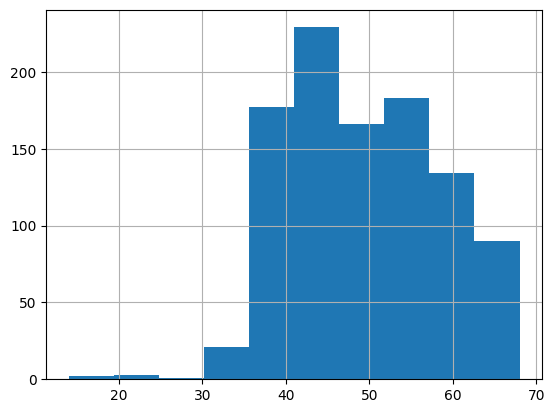

In [16]:
data.age.hist()

<Axes: ylabel='age'>

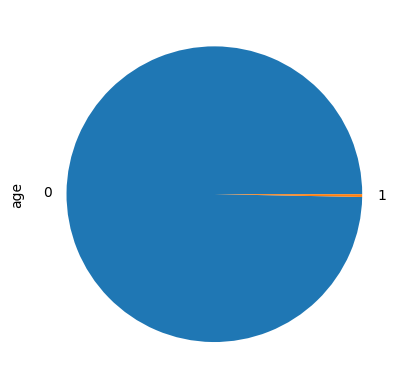

In [17]:
data.groupby('FEVER').age.count().plot(kind='pie')

In [18]:
sns.countplot(data.Vomiting)

NameError: name 'sns' is not defined

<Axes: ylabel='Frequency'>

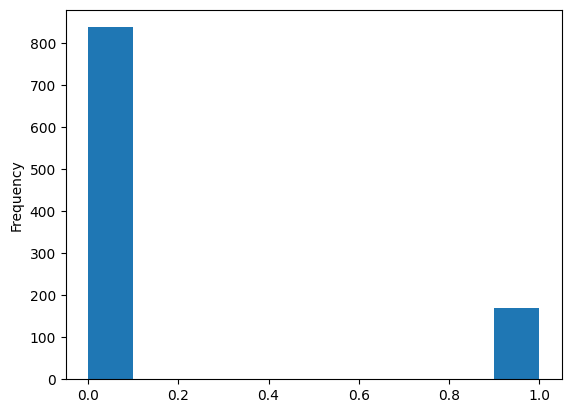

In [19]:
data.Dengue.plot(kind='hist' , grid = False)

In [20]:
sns.countplot(data.Tirdness)
plt.show()

NameError: name 'sns' is not defined

<Axes: ylabel='Dengue'>

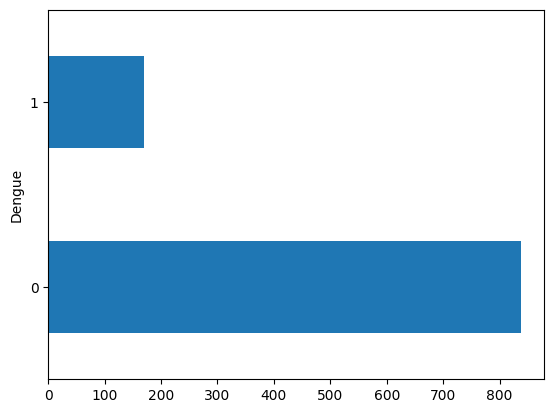

In [21]:
data.groupby('Dengue').FEVER.count().plot(kind='barh')

In [22]:
sns.heatmap(data.corr(),annot=False)

NameError: name 'sns' is not defined

<Axes: xlabel='age'>

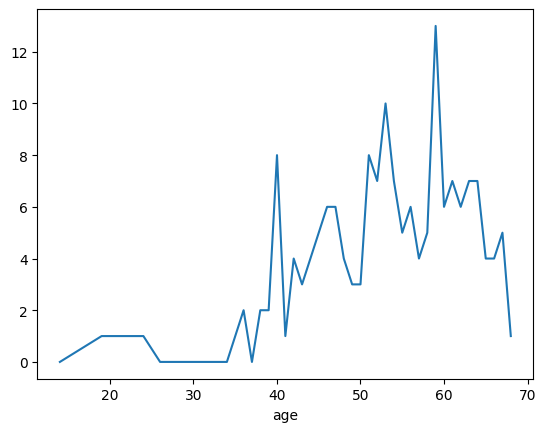

In [23]:
data.groupby('age').Dengue.sum().plot(kind='line')

<Axes: xlabel='age'>

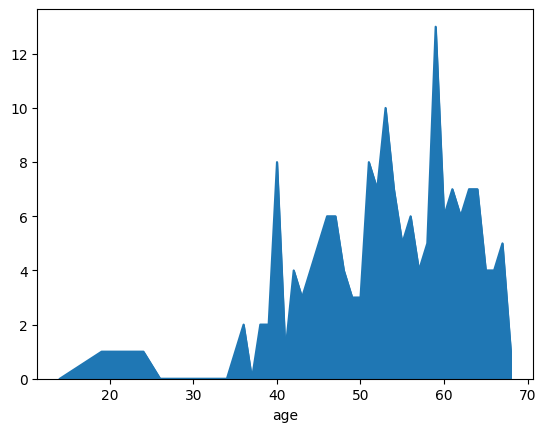

In [24]:
data.groupby('age').Dengue.sum().plot(kind='area')

In [25]:
sns.boxplot(x='Dengue',y='age',data=data)

NameError: name 'sns' is not defined

# pre-processsed data

In [26]:
preprocessed_dataset = data.fillna('0')

print("Train dataset before pre-processing:")
print("=========================================\n")
print(data)

print("\n\n\nTrain dataset after pre-processing:")
print("=========================================\n")
print(preprocessed_dataset)

Train dataset before pre-processing:

index  male  age  Vomiting  Nausea  Tirdness  Musclepain  Eyepain  FEVER  \
0         1   39         0       0         0           0        0      0   
1         0   46         0       0         1           0        0      0   
2         1   48         0       0         1           0        1      0   
3         0   61         1       0         1           1        0      0   
4         0   46         0       0         0           1        0      0   
...     ...  ...       ...     ...       ...         ...      ...    ...   
1001      1   46         0       0         0           1        1      0   
1002      1   60         0       0         0           1        1      0   
1003      0   64         0       0         0           1        0      0   
1004      0   43         0       0         0           0        1      0   
1005      1   50         0       0         0           0        0      0   

index  sysBP  diaBP  heartRate  Dengue  
0      1

In [27]:
preprocessed_dataset.head()

index,male,age,Vomiting,Nausea,Tirdness,Musclepain,Eyepain,FEVER,sysBP,diaBP,heartRate,Dengue
0,1,39,0,0,0,0,0,0,106.0,70.0,80.0,0
1,0,46,0,0,1,0,0,0,121.0,81.0,95.0,0
2,1,48,0,0,1,0,1,0,127.5,80.0,75.0,0
3,0,61,1,0,1,1,0,0,150.0,95.0,65.0,1
4,0,46,0,0,0,1,0,0,130.0,84.0,85.0,0


# no need for Label Encoding for Train/Test Data

# Train ML Algorithms using Data

In [28]:
x=preprocessed_dataset.iloc[:, :-1].values
y=preprocessed_dataset.iloc[:, -1:].values

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train ML Algorithms using Logistic Regression

In [30]:
logisticRegression=LogisticRegression()
logisticRegression.fit(x_train,y_train)
LR = logisticRegression.predict(x_test)
accuracy_score(y_test, LR)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8168316831683168

# Train ML Algorithms using Random Forest Classifier

In [31]:
randomForest=RandomForestClassifier()
randomForest.fit(x_train,y_train)
RF = randomForest.predict(x_test)
accuracy_score(y_test, RF)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2992\3108075893.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(x_train,y_train)


0.8118811881188119

# Train ML Algorithms using linearSvc

In [32]:
linearSvc=LinearSVC()
linearSvc.fit(x_train,y_train)
LS = linearSvc.predict(x_test)
accuracy_score(y_test, LS)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8316831683168316

# Train ML Algorithms using BernoulliNB

In [33]:
bernoulliNB=BernoulliNB()
bernoulliNB.fit(x_train,y_train)
NB = bernoulliNB.predict(x_test)
accuracy_score(y_test, NB)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8217821782178217

# Save the Trained Model as Pickle File

In [34]:
filename='Dengue_model.sav'
pickle.dump(randomForest,open(filename,'wb'))

# Load the Trained Model

In [35]:
loadBM=pickle.load(open(filename,'rb'))

In [36]:
print(loadBM)

RandomForestClassifier()


# Take Input from User

In [ ]:
male=input("0 = Male BP 1 = Female")
age=input("Enter your age")
Vomiting=input("Are you vomitting?0 = no 1 = yes")
Nausea=input("Are you feeling nausea?0 = no 1 = yes")
Tirdness=input("Are you feeling tirdness?0 = no 1 = yes")
Musclepain=input("Are you feeling musclepain?0 = no 1 = yes")
Eyepain=input("Are you feeling eyepain?0 = no 1 = yes")
FEVER=input("Are you having fever?0 = no 1 = yes")
sysBP=input("Your upper BP?")
diaBP=input("Your lowerBP?")
heartRate=input("Your Heart beat")

0 = Male BP 1 = Female0
Enter your age61
Are you vomitting?0 = no 1 = yes1
Are you feeling nausea?0 = no 1 = yes0
Are you feeling tirdness?0 = no 1 = yes1
Are you feeling musclepain?0 = no 1 = yes1


In [38]:
print("user input \n")
newdf=pd.DataFrame({"Gender":male,"age":age,"Vomiting":Vomiting,"Nausea":Nausea,
                    "Tirdness":Tirdness,"Musclepain":Musclepain,"Eyepain":Eyepain,
                    "FEVER":FEVER,"sysBP":sysBP,"diaBP":diaBP,"heartRate":heartRate},index=[0])
print(newdf)

user input 

  Gender age Vomiting Nausea Tirdness Musclepain Eyepain FEVER sysBP diaBP  \
0      1  39        0      0        0          0       0     0   106    70   

  heartRate  
0        80  


# Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User

In [39]:
outputPredictionBM= loadBM.predict(newdf)

if outputPredictionBM==0:
    Dengue= "Patient has no dengue"
    
elif outputPredictionBM==1:
    Dengue="Patient has Dengue"

print("\n Prediction: %s"%Dengue)


 Prediction: Patient has no dengue


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
